Grupo: Johnson Gomez, Juan David Aristizabal, Luz Iriarte

#1. Entendimiento de negocio

* **Definir objetivo de negocio según lo que usted considere que puede ser de mayor utilidad según los datos elegidos:** Incorporar en el software de la clínica un sistema de notificaciones que alerte a los médicos sobre pacientes con indicios de posibles paros cardíacos. Este sistema tiene como propósito facilitar la revisión de los casos por parte del equipo médico y promover un diagnóstico más oportuno y preciso.

* **Definir objetivo analítico:** Diseñar y entrenar un modelo de Machine Learning con una precisión mínima del 85%, capaz de predecir o clasificar a los pacientes con un historial que los haga propensos a sufrir un paro cardíaco, apoyando así al equipo médico en la toma de decisiones. En caso de no alcanzar la métrica definida con los datos proporcionados, se deberán establecer los pasos necesarios para mejorar el modelo en el futuro, incluyendo la identificación de datos adicionales requeridos.

#2. Entendimiento de los datos


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/heart.csv')
data_o2 = pd.read_csv('/content/o2Saturation.csv')

En el dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data se encuentran dos archivos: heart.csv y o2Saturation.csv. Sin embargo, el archivo o2Saturation.csv tiene un shape de (3585, 1), que no coincide con el shape del archivo heart.csv (303, 14), lo que impide asumir que ambos datasets están en el mismo orden. Además, o2Saturation.csv no contiene etiquetas que permitan relacionarlo con heart.csv y, por esta razón, no será utilizado en este trabajo.

In [27]:
print(data.shape, data_o2.shape)

(303, 14) (3585, 1)


In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print(data.info(),'\n',"--"*20,'\n',data.nunique())
#Todas las variables que tenemos son int64 o float64
#El data.nunique + el contexto de cada variable, nos ayuda a definir si es una variable categórica o numérica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None 
 ---------------------------------------- 
 age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp      

**Entendimiento de las variables**
No todas las variables estaban bien definidas en la documentación, asi que se hace una investigación para entender cada variable y así saber que tipo de variable es.


* Age (numerica) : Representa la edad del paciente en años.
* Sex (categorica) : Indica el género del paciente. 0 = mujer 1 = hombre
* cp (categorica) : Tipo de dolor en el pecho experimentado por el paciente.
0: Angina típica.
1: Angina atípica.
2: Dolor no anginoso.
3: Asintomático.
* trtbps (numerica) : Presión arterial en reposo medida en mmHg. Un nivel elevado puede indicar hipertensión, que es un factor de riesgo para enfermedades del corazón.
* chol (numerica) : Nivel de colesterol total en sangre medido en mg/dl tomados via BMI sensor.
* fbs (categorica) : Indica si el nivel de azúcar en sangre en ayunas es mayor a 120 mg/dl. 1: Verdadero. 0: Falso.
* rest_ecg (categorica) : Resultados del electrocardiograma en reposo.
0: Normal.
1: Anormalidad en las ondas ST-T (T wave inversions, elevación o depresión del ST > 0.05 mV).
2: Hipertrofia ventricular izquierda (por criterios de Estes).
* thalach (numerica) : Máxima frecuencia cardíaca alcanzada durante una prueba de esfuerzo.

* exang (categorica) : Presencia de angina inducida por el ejercicio. 1: Sí.
0: No.
* oldpeak (numerica): Depresión del segmento ST medida en un ECG durante una prueba de esfuerzo. Valores más altos pueden indicar isquemia o daño al corazón.
* slp (categorica) : Pendiente del segmento ST durante una prueba de esfuerzo.
0: Descendente (puede indicar isquemia).
1: Plana (posible anormalidad).
2: Ascendente (respuesta normal del corazón al ejercicio).
* caa (numerica) : Indica el número de vasos sanguíneos principales que tienen obstrucciones visibles mediante angiografía (una técnica de imagen para observar vasos sanguíneos).Los valores están en el rango de 0 a 4.
0: Sin vasos bloqueados. 1-4: Número de vasos con bloqueos significativos.

* thall (categorica) : Se refiere a los resultados de una prueba de esfuerzo con talio (Thallium Stress Test), que evalúa el flujo sanguíneo al corazón. Mide cómo fluye la sangre a través de las arterias durante el ejercicio y el reposo.
0 = null
1 = fixed defect
2 = normal
3 = reversable defect
* output (categorica) :  Indica el riesgo de ataque cardíaco.
0: Menor probabilidad de ataque cardíaco.
1: Mayor probabilidad de ataque cardíaco.


In [9]:
data_num =data[['age','trtbps','chol','thalachh','oldpeak','caa']]
data_cat = data[['sex','cp','fbs','restecg','slp','exng','thall','output']].astype('category')

In [29]:
data_num.describe()

,age,trtbps,chol,thalachh,oldpeak,caa
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [8]:
data_cat.describe(include='category')

,sex,cp,fbs,restecg,slp,exng,thall,output
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,3,2,4,2
top,1,0,0,1,2,0,2,1
freq,207,143,258,152,142,204,166,165


In [10]:
variables_numericas = list(data_num.columns)
variables_categoricas = list(data_cat.columns)

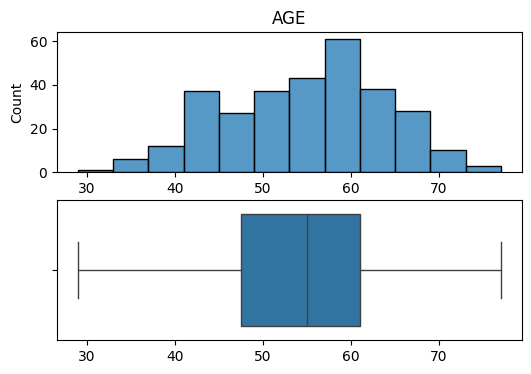

-------------------------------------------------------------------------------------------------------------------------


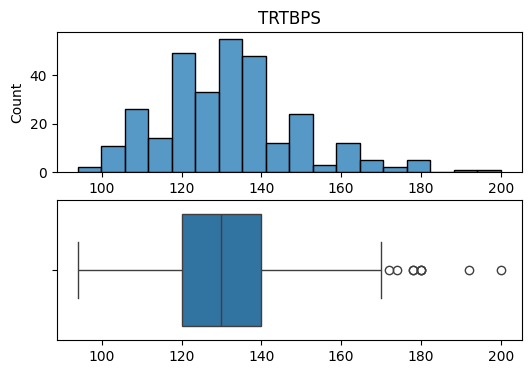

-------------------------------------------------------------------------------------------------------------------------


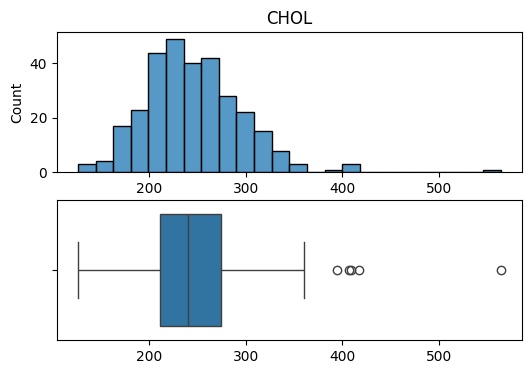

-------------------------------------------------------------------------------------------------------------------------


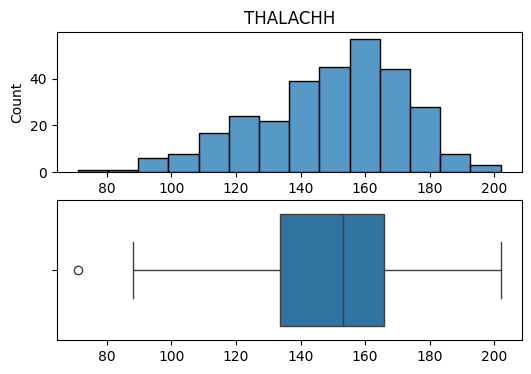

-------------------------------------------------------------------------------------------------------------------------


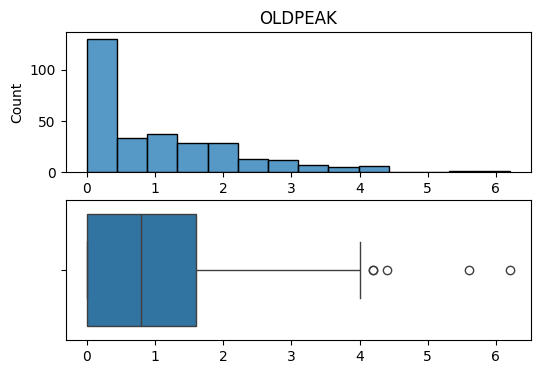

-------------------------------------------------------------------------------------------------------------------------


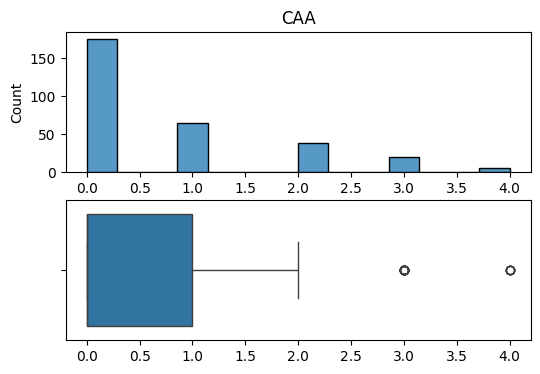

-------------------------------------------------------------------------------------------------------------------------


In [10]:
for i, col in enumerate(variables_numericas):
  fig, axes = plt.subplots(2, 1, figsize=(6, 4))
  sns.histplot(data[col], ax=axes[0])
  axes[0].set_title(col.upper())
  axes[0].set_xlabel('')
  sns.boxplot(x=data[col], ax=axes[1])
  axes[1].set_xlabel('')
  plt.show()
  print('-------------------------------------------------------------------------------------------------------------------------')

**Análisis variables numéricas:**

La mayoria de los casos se encuentran en un rango de edad entre 40 a 60 años y solo se cuenta con datos de personas mayores de 29 años. En cuanto a la presion arterial en reposo, los datos estan concentrados en una presion arterial de 120 a 140 mmHg, lo que se podria considerar como normal para el rango de edades que poseemos en nuestros datos. Existen algunos outliers con presion arterial alta (mayor a 170 mmHg). De igual forma para la variable colesterol (Chol), la mayoria de los datos se concentran sobre los 220 a los 270 aproximadamente, lo que indica que la mayor parte de nuestros casos se encuentran en el límite alto recomendado de colesterol. Se identifican tambien unos outliers, con niveles de colesterol bastante altos por encima de los 400mg/dL. En cuanto a la max frecuencia cardiaca durante las pruebas de esfuerzo (Thalachh), los casos muestran un IQR entre 135 y 165 aprox, lo que se puede considerar normal para personas entre los 40 y 60 años. La mayoría de los pacientes tienen valores bajos de oldpeak, lo que puede indicar que sus corazones responden bien al estrés físico. Los pacientes con oldpeak elevado (especialmente los outliers) pueden requerir una evaluación más detallada, ya que podrían estar en riesgo de enfermedades cardiovasculares. La mayoria de los pacientes tienen 0 o 1 vaso sanguineos (caa) con obstruccion. Existen algunos outliers de casos de pacientes con 2,3 y 4 vasos sanguineos principales con obstrucciones.

In [11]:
labels_categoricas = {
    'sex': {0: 'Mujer', 1: 'Hombre'},
    'cp': {0: 'Angina típica', 1: 'Angina atípica', 2: 'Dolor no anginoso', 3: 'Asintomático'},
    'fbs': {0: 'Falso', 1: 'Verdadero'},
    'rest_ecg': {0: 'Normal', 1: 'Anormalidad', 2: 'Hipertrofia ventricular izquierda'},
    'exang': {0: 'No', 1: 'Sí'},
    'slp': {0: 'Descendente', 1: 'Plana', 2: 'Ascendente'},
    'thall': {0: 'Null', 1: 'Fixed defect', 2: 'Normal', 3: 'Reversible defect'},
    'output': {0: 'Menor riesgo', 1: 'Mayor riesgo'}
}

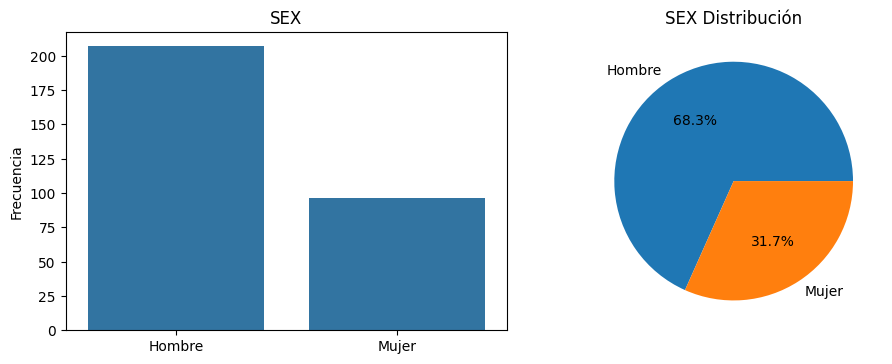

-------------------------------------------------------------------------------------------------------------------------


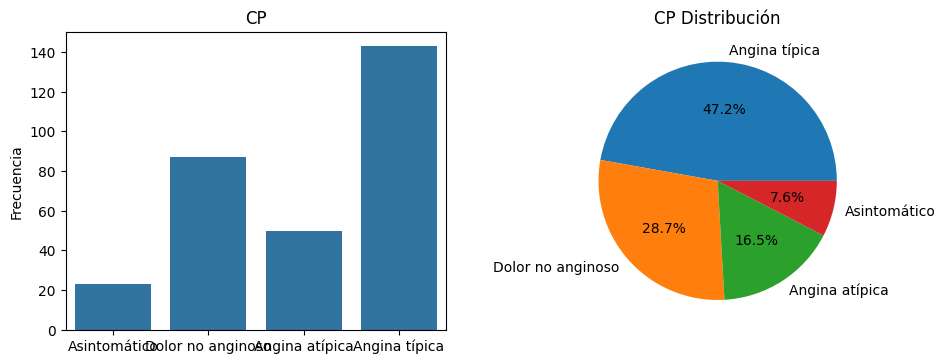

-------------------------------------------------------------------------------------------------------------------------


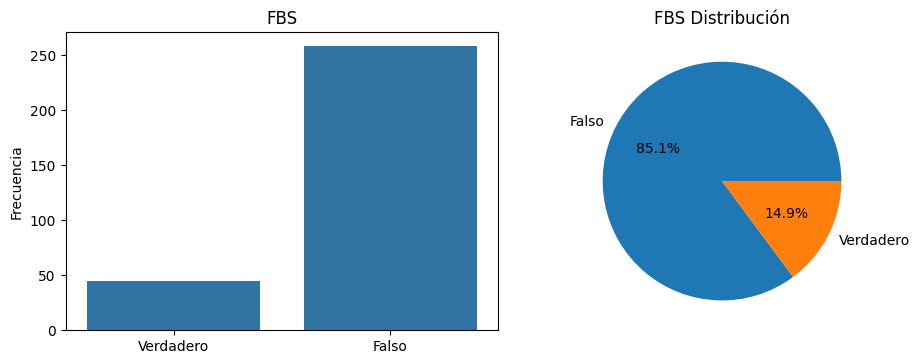

-------------------------------------------------------------------------------------------------------------------------


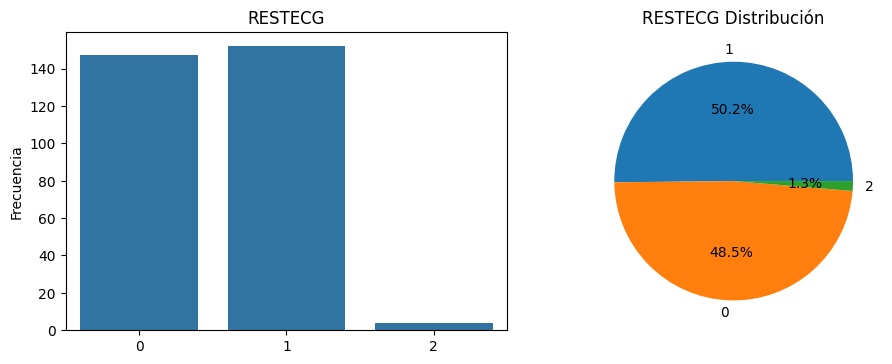

-------------------------------------------------------------------------------------------------------------------------


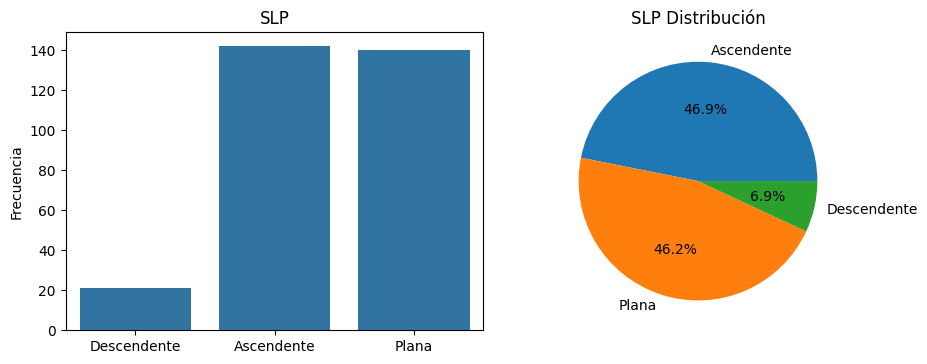

-------------------------------------------------------------------------------------------------------------------------


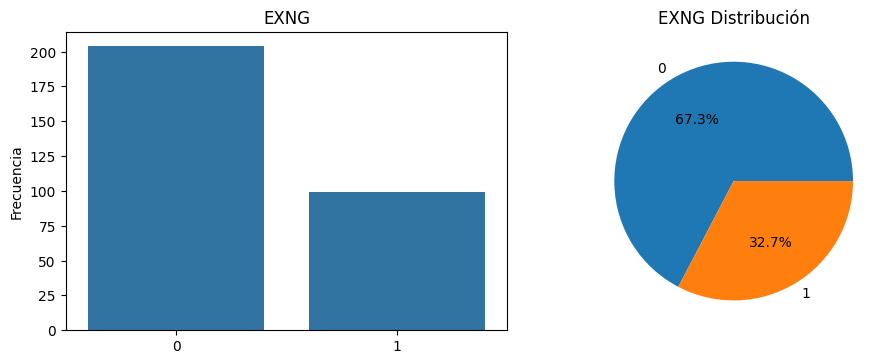

-------------------------------------------------------------------------------------------------------------------------


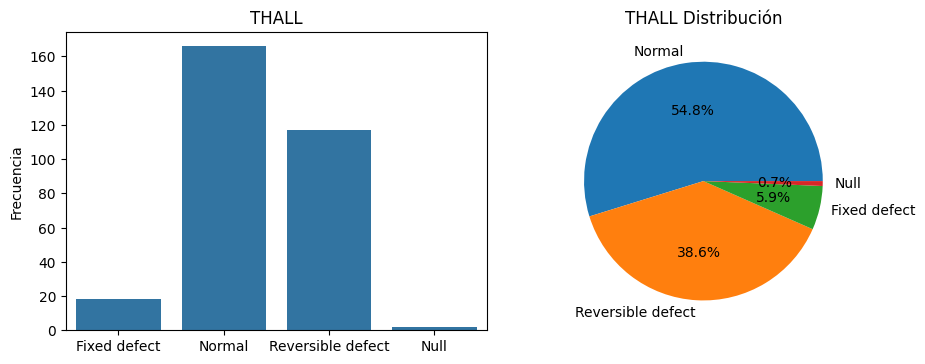

-------------------------------------------------------------------------------------------------------------------------


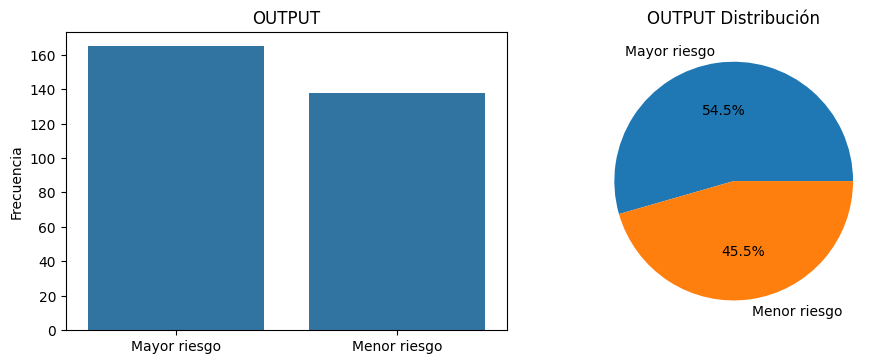

-------------------------------------------------------------------------------------------------------------------------


In [91]:
for i, col in enumerate(variables_categoricas):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    mapped_data = data[col].map(labels_categoricas[col]) if col in labels_categoricas else data[col]

    sns.countplot(x=mapped_data, ax=axes[0])
    axes[0].set_title(col.upper())
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Frecuencia')

    mapped_data.value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
    axes[1].set_title(f'{col.upper()} Distribución')
    axes[1].set_ylabel('')

    plt.tight_layout(pad=2)
    plt.show()

    print('-------------------------------------------------------------------------------------------------------------------------')

**Análisis de variables categóricas:**

El dataset posee informacion balanceada en cuanto a numeros de casos con mayor y menor riesgo de un ataque cardiaco. El 68% de casos del dataset corresponden a hombres. El 47% de los casos presenta una agina tipica, sin embargo, esta no esta relacionada con el ejercicio pues en el 63% de los casos, no existe presencia de angina inducida por el ejercico. En cuanto a la distribucion de SLP, en un 93% de los casos la pendiente presenta de forma equitativa una posible anormalidad o una respuesta normal del corazón al ejercicio, son muy pocos los casos con indicios de isquemia. En cuanto a los niveles de azucar en la sangre en ayunas (FBS), el 85% de los casos presentan un nivel de azucar menor a 120 mg/dl.  

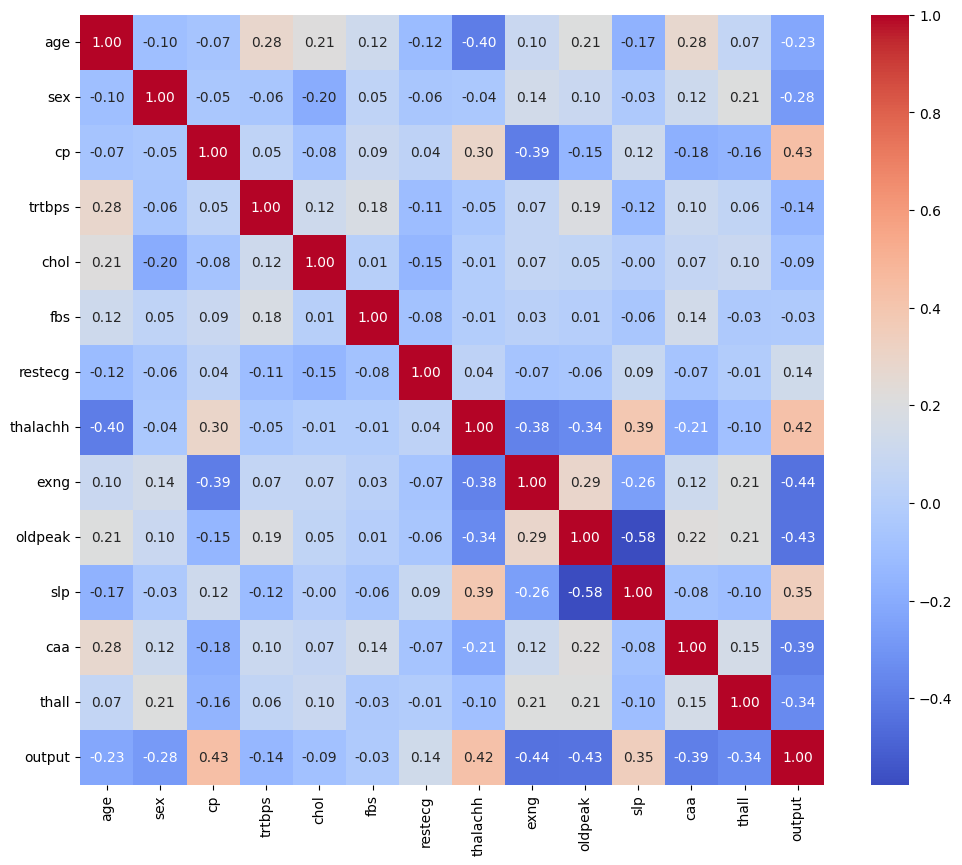

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Análisis Bivariante:**

No hay una correlacion lineal significativa entre las variables.
Las unicas que podrian tener una correlacion lineal inversa son slp y oldpeak, lo que tiene sentido ya que la interpretacion de estas variables,
Estan ambas relacionadas de forma inversa con la pendiente del ST.
De igual forma se ve una correlacion moderada entre thalach (max frecuencia cardiaca en pruebas de esfuerzo) vs el output (mayor riesgo)
lo que puede sugerir que a mayor frecuencia cardiaca, mayor es la probabilidad de ataques cardiacos.
No se logra ver una separacion clara por mayor/menor riesgo en los diagramas de dispersion de las diferentes variables.

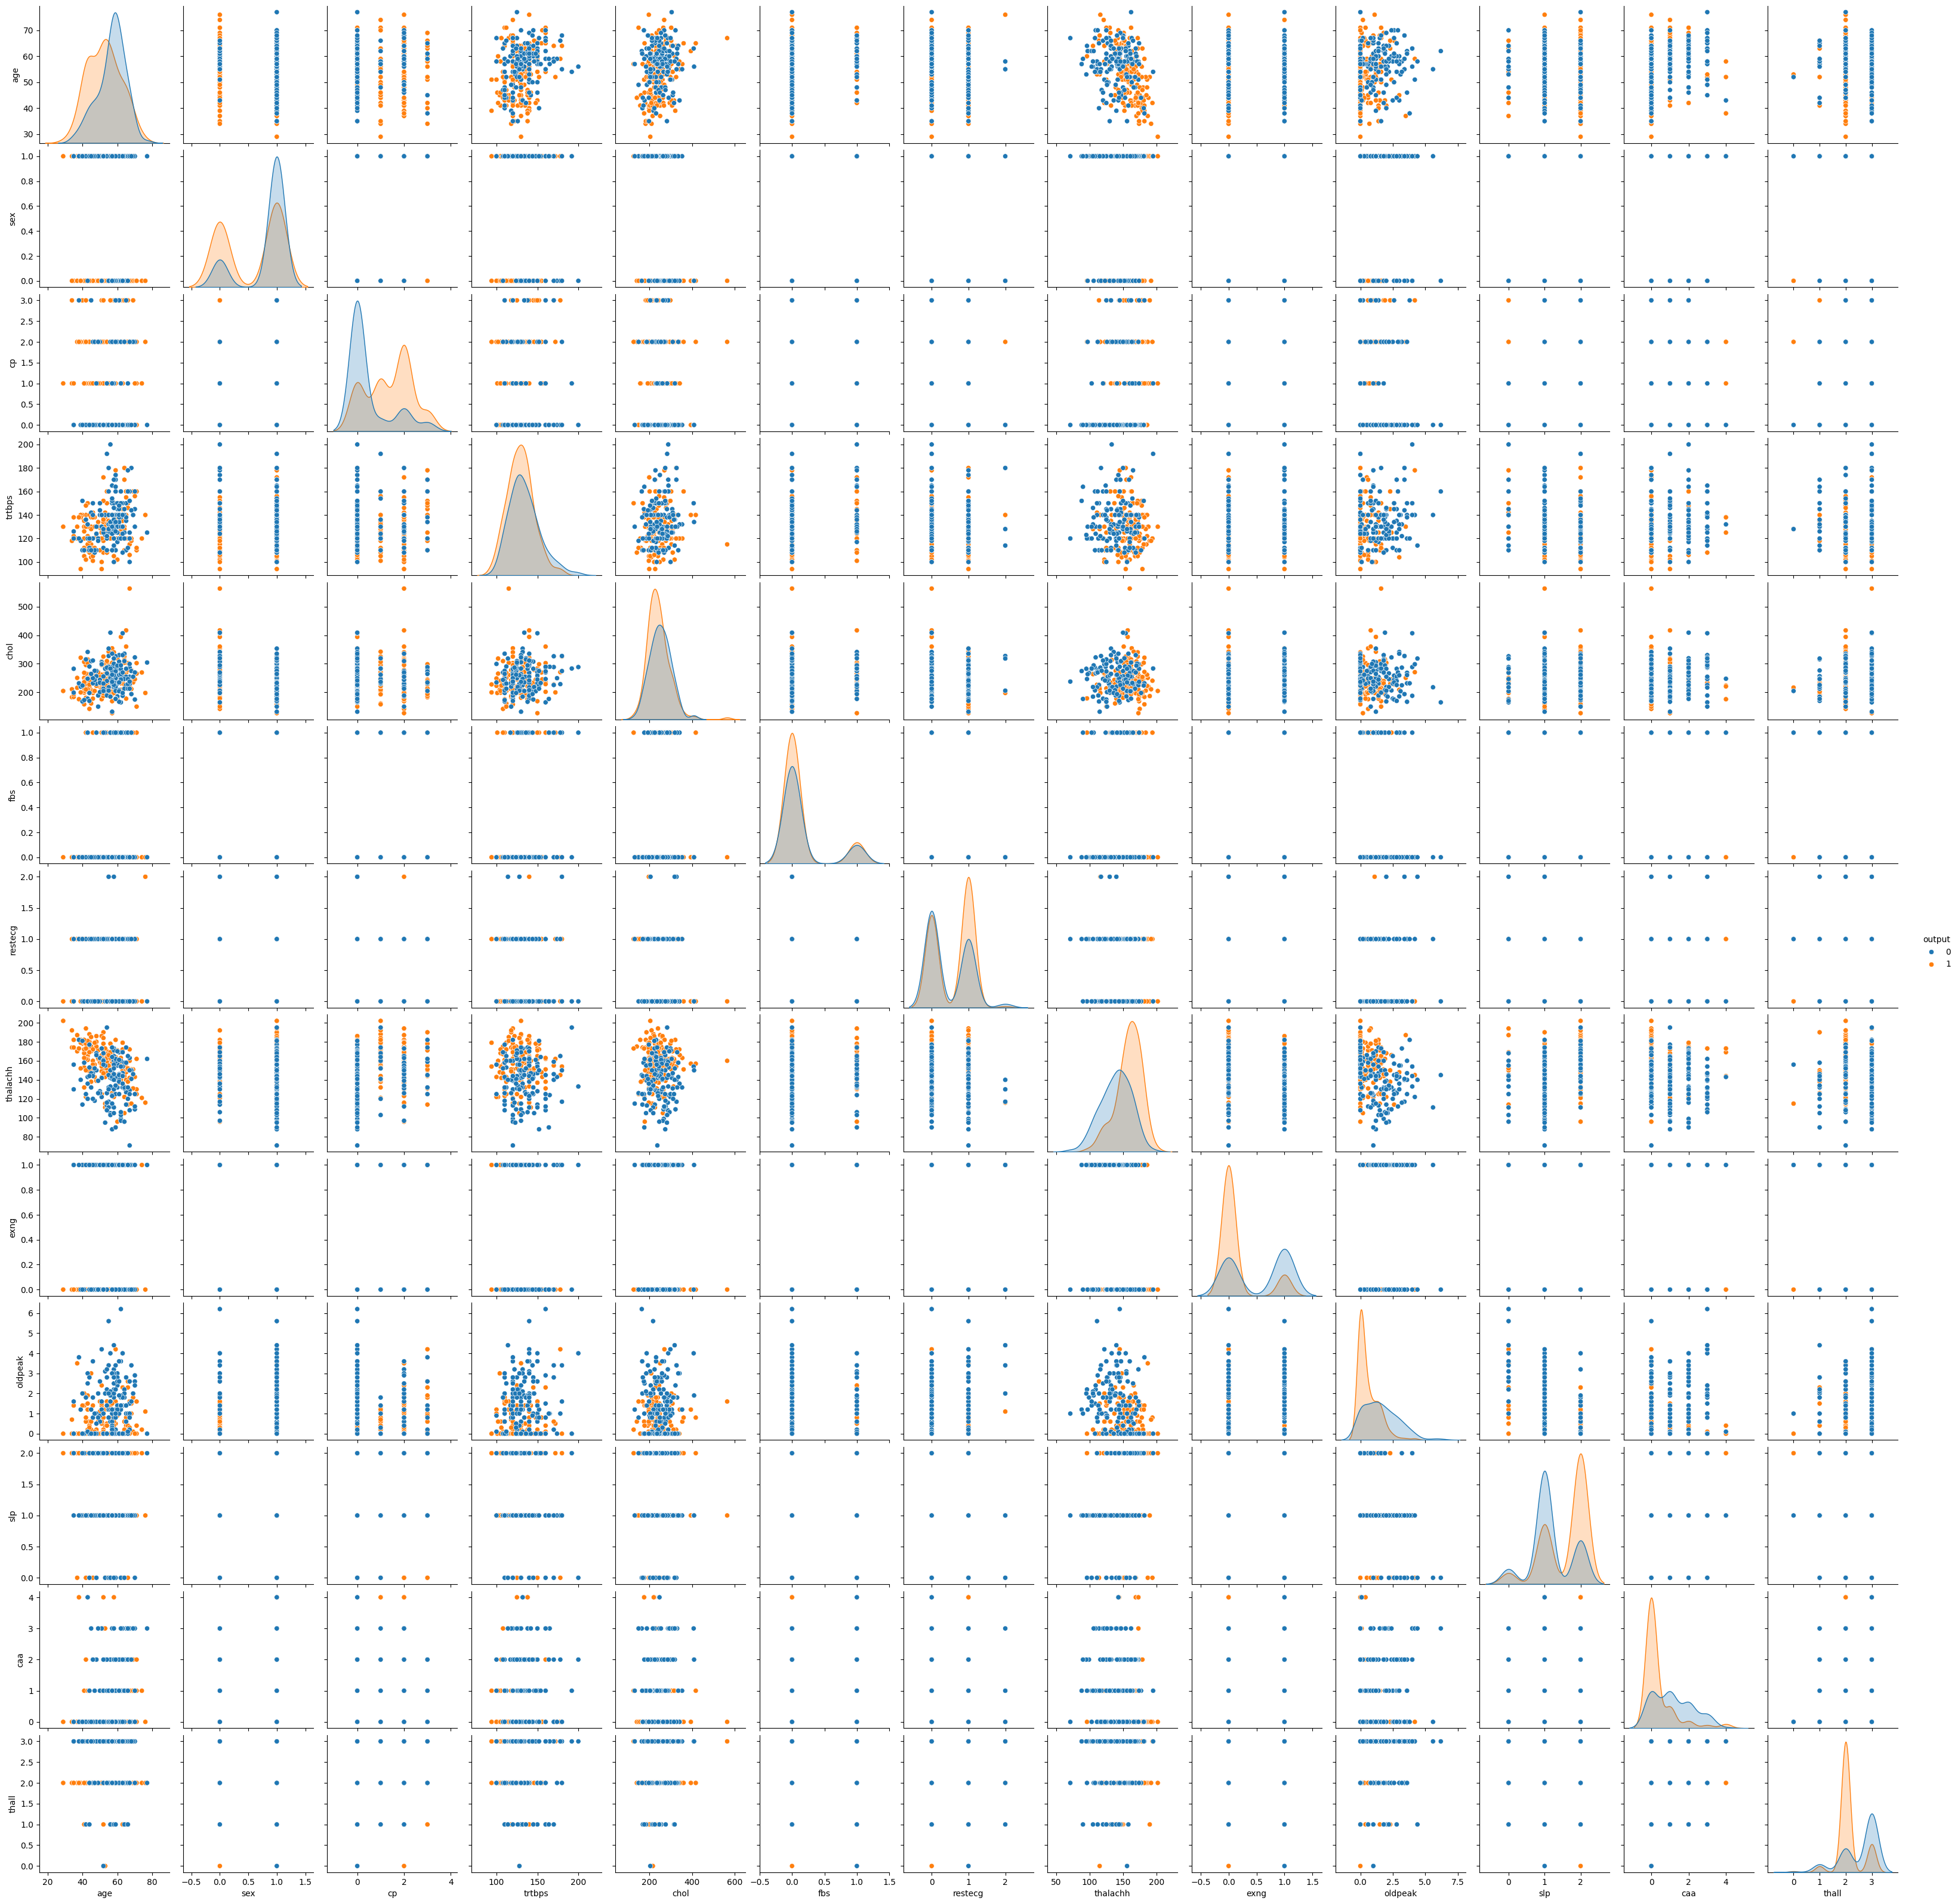

In [84]:
sns.pairplot(data, hue='output')
plt.show()

#3. Preparación de datos

* Transformaciones para variables de entrada.

1. Eliminación de valores faltantes: No aplica para nuestro caso pues no tenemos columnas con datos nulos.

2. Eliminación de filas/columnas: A pesar de que tenemos columnas desbalanceadas, se decide por conservar todas las columnas ya que aportan informacion relevante. El desbalanceo está entre 2 o 3 variables, y no en una sola variable.

3. Codificación de variables categóricas One-Hot Encoding o Label Encoding. Nuestras variables categoricas ya se encuentran en valores numericos. Sin embargo, hay una variable que hasta el momento se ha tratado como variable númerica y que puede ser también categórica, que es el caa. Debido a que representa el numero de vasos obstruidos, tiene la opcion de ser numerica o categorica, por lo tanto, la vamos a convertir.

4. Escalado de datos numéricos (Min-Max Scaling, StandardScaler): Centra los datos en torno a 0 con una desviación estándar de 1.

5. Detección y manejo de outliers: A pesar de que tenemos variables con datos outliers, no los vamos a remover pues los valores no parecen ser errores en la recopilacion de datos, sino, casos especiales de pacientes.

6. PCA o técnicas de reducción de dimensionalidad: Reducción de dimensionalidad para evitar redundancias en los datos.

* Transformaciones para variable de salida.
1. Codificación de clases (para variables categóricas): Reasignar etiquetas de clases (e.g., convertir "Sí" y "No" en 1 y 0). En este caso vamos a continuar usando las categorias con numeros.

2. Balanceo de clases. Oversampling: Aumentar la frecuencia de la clase minoritaria. Undersampling: Reducir la frecuencia de la clase mayoritaria.

3. Transformación de escala: Para problemas de regresión, aplicar escalado o normalización, si los valores están en diferentes magnitudes.

4. Conversión de valores continuos a categorías: Ejemplo, Dividir valores numéricos en rangos o bins (e.g., bajo, medio, alto).

In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [11]:
scale_cols = ['trtbps', 'chol', 'thalachh', 'oldpeak']
age_only =  'age'

min_max_scaler = MinMaxScaler()
data[age_only] = min_max_scaler.fit_transform(data[[age_only]])

ss = StandardScaler()
data[scale_cols] = ss.fit_transform(data[scale_cols])

X = data.drop('output',axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Modelación

* Utilice por lo menos 5 modelos de ML. Uno de estos debe ser un método de
ensamble.
* Haga una búsqueda de hiperparámetros para cada uno de los modelos.
* Aunque no es una obligación, se recomienda investigar y utilizar la librería PyCaret en esta etapa.

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(f'Regresion Logistica: {accuracy_score(y_test, pred_lr)}')

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
print(f'KNN: {accuracy_score(y_test, pred_knn)}')

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)
print(f'Naive Bayes: {accuracy_score(y_test, pred_nb)}')

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(f'Random Forest: {accuracy_score(y_test, pred_rf)}')

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(f"Arbol de decision: {accuracy_score(y_test, pred_dt)}")

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
print(f"Gradient Boosting{accuracy_score(y_test, pred_gbc)}")

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)
print(f"AdaBoost: {accuracy_score(y_test, pred_abc)}")

bc = BaggingClassifier()
bc.fit(X_train, y_train)
pred_bc = bc.predict(X_test)
print(f"Bagging Classifier: {accuracy_score(y_test, pred_bc)}")

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xbg = xgb.predict(X_test)
print(f"XGBClassifier: {accuracy_score(y_test, pred_xbg)}")

Regresion Logistica: 0.8524590163934426
KNN: 0.8852459016393442
Naive Bayes: 0.8688524590163934
Random Forest: 0.8524590163934426
Arbol de decision: 0.819672131147541
Gradient Boosting0.7868852459016393
AdaBoost: 0.8032786885245902
Bagging Classifier: 0.819672131147541
XGBClassifier: 0.819672131147541


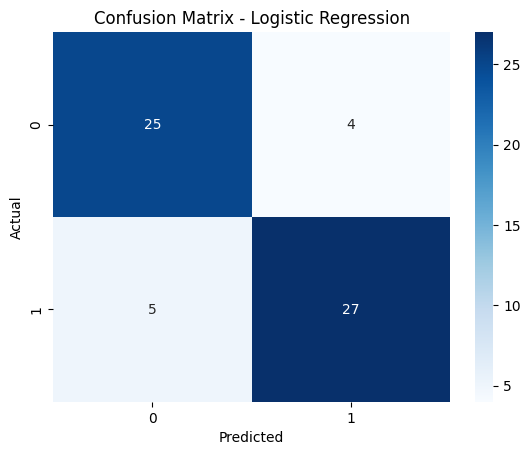

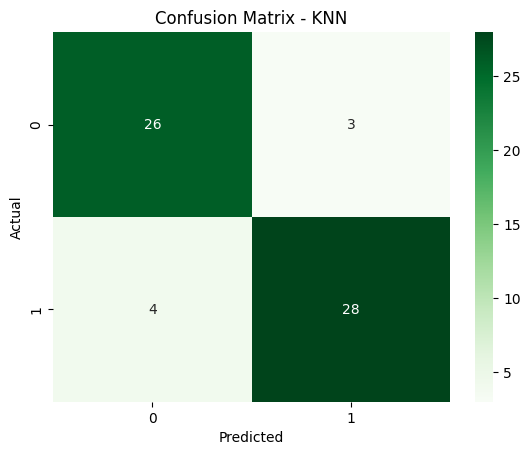

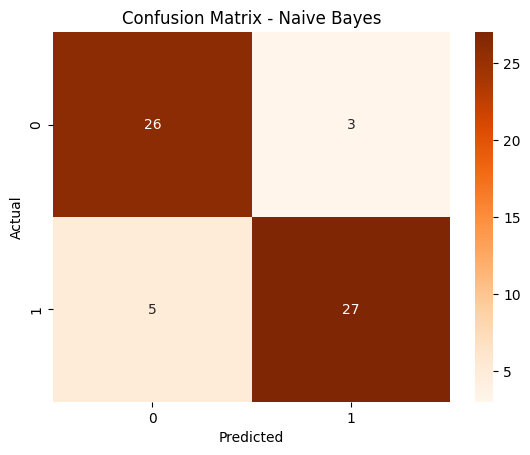

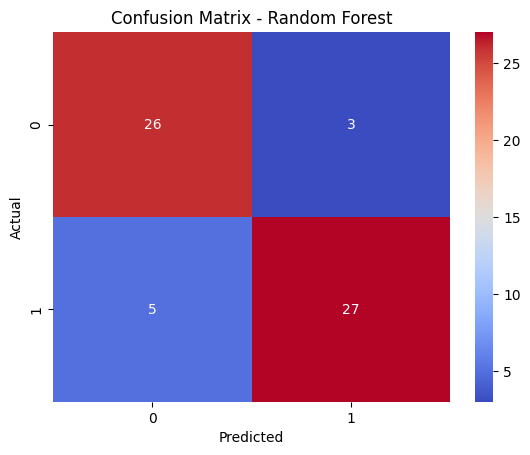

In [14]:
#Vamos a revisar los modelos con accuracy por encima de 85%

cm_reglog = confusion_matrix(y_test, pred_lr)
cm_knn = confusion_matrix(y_test, pred_knn)
cm_nb = confusion_matrix(y_test, pred_nb)
cm_rf = confusion_matrix(y_test, pred_rf)

sns.heatmap(cm_reglog, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.heatmap(cm_nb, annot=True, fmt='d', cmap="coolwarm")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Busqueda de Hiperparametros Regresion Logistica

In [15]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']})

In [16]:
print(grid_search_lr.best_score_ , grid_search_lr.best_params_ , grid_search_lr.best_estimator_)

0.8306972789115645 {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} LogisticRegression(C=0.1)


Regresion Logistica: 0.8852459016393442


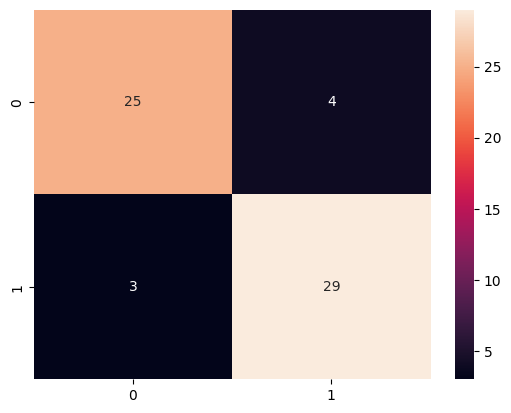

In [17]:
lr_best = grid_search_lr.best_estimator_
lr_best.fit(X_train, y_train)

print(f'Regresion Logistica: {accuracy_score(y_test, lr_best.predict(X_test))}')
sns.heatmap(confusion_matrix(y_test, lr_best.predict(X_test)), annot=True, fmt='d')
plt.show()

##Busqueda de Hiperparametros KNN

In [18]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','chebyshev']
}

grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [19]:
print(grid_search_knn.best_score_ , grid_search_knn.best_params_ , grid_search_knn.best_estimator_)

0.8222789115646257 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'} KNeighborsClassifier(metric='manhattan')


KNN: 0.8688524590163934


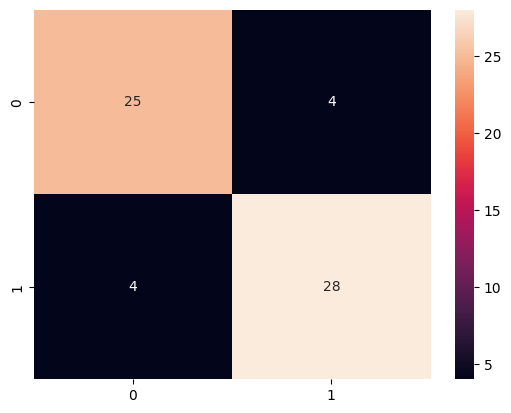

In [20]:
knn_best = grid_search_knn.best_estimator_
knn_best.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn_best.predict(X_test))}')
sns.heatmap(confusion_matrix(y_test, knn_best.predict(X_test)), annot=True, fmt='d')
plt.show()

##Busqueda de Hiperparametros Naive Bayes

In [21]:
param_grid_nb = {
 'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_nb = GridSearchCV(model_nb, param_grid_nb, cv=5)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [22]:
print(grid_search_nb.best_score_ , grid_search_nb.best_params_ , grid_search_nb.best_estimator_)

0.789030612244898 {'var_smoothing': 1e-09} GaussianNB()


Naive Bayes: 0.8688524590163934


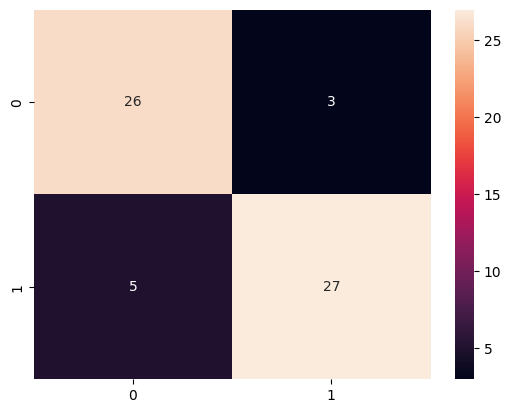

In [23]:
nb_best = grid_search_nb.best_estimator_
nb_best.fit(X_train, y_train)

print(f'Naive Bayes: {accuracy_score(y_test, nb_best.predict(X_test))}')
sns.heatmap(confusion_matrix(y_test, nb_best.predict(X_test)), annot=True, fmt='d')
plt.show()

##Busqueda de Hiperparametros Random Forest

In [24]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
print(grid_search_rf.best_score_ , grid_search_rf.best_params_ , grid_search_rf.best_estimator_)

0.8305272108843538 {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} RandomForestClassifier(max_depth=10, min_samples_split=5)


Random Forest: 0.8360655737704918


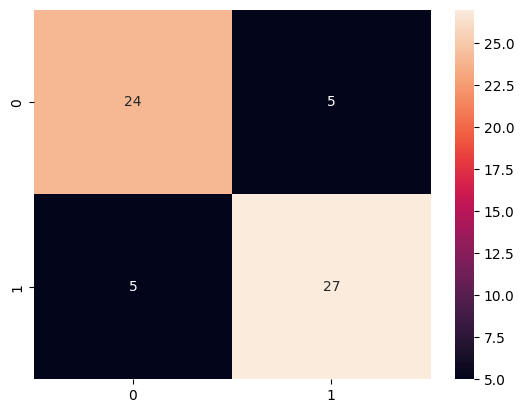

In [26]:
rf_best = grid_search_rf.best_estimator_
rf_best.fit(X_train, y_train)

print(f'Random Forest: {accuracy_score(y_test, rf_best.predict(X_test))}')
sns.heatmap(confusion_matrix(y_test, rf_best.predict(X_test)), annot=True, fmt='d')
plt.show()

##Busqueda de Hiperparametros Bagging Classifier

In [27]:
param_grid_bc = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=3),
                       DecisionTreeClassifier(max_depth=5)],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
grid_search_bc = GridSearchCV(bc, param_grid_bc, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_bc.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'estimator': [DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5)],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [28]:
print(grid_search_bc.best_score_ , grid_search_bc.best_params_ , grid_search_bc.best_estimator_)

0.8388605442176871 {'bootstrap': True, 'bootstrap_features': False, 'estimator': DecisionTreeClassifier(max_depth=3), 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 10} BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.7)


Bagging Classifier: 0.819672131147541


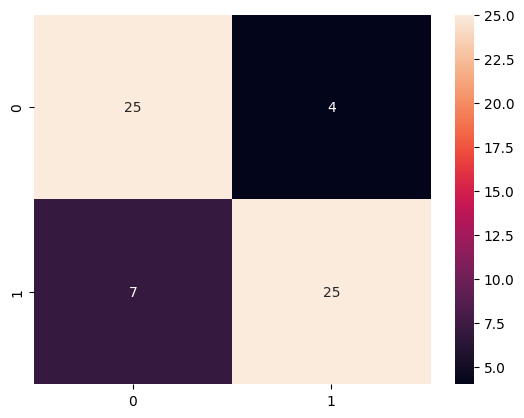

In [29]:
bc_best = grid_search_bc.best_estimator_
bc_best.fit(X_train, y_train)

print(f'Bagging Classifier: {accuracy_score(y_test, bc_best.predict(X_test))}')
sns.heatmap(confusion_matrix(y_test, bc_best.predict(X_test)), annot=True, fmt='d')
plt.show()

#5. Evaluación

* Para el caso planteado, ¿Cuál es la métrica de desempeño de mayor importancia? ¿Por qué?

En nuestra matriz de confusión, nos interesa hacerle seguimiento a los falsos negativos, los cuales se encuentran en la posición:
Clase real: Alto riesgo (1) + Predicción: Bajo riesgo (0) = Falsos Negativos (FN)
Por lo tanto, la métrica que mas nos interesa es el Recall.


* Defina el mejor modelo.

El modelo seleccionado es regresion logistica (luego de la busqueda de hiperparametros), ya que ofrece las mejores métricas de accuracy (0.88) y recall (0.91) y ademas de una ventaja significativa en eficiencia computacional y escalabilidad.

* ¿Valdría la pena usar el mejor modelo en el día a día de una empresa/institución?

La implementación de este modelo sería valiosa como una herramienta de apoyo para el equipo médico. Su propósito principal sería identificar y alertar sobre posibles casos de riesgo, permitiendo priorizar la revisión de pacientes. Sin embargo, no debe utilizarse como una herramienta definitiva para el diagnóstico, sino como un complemento que facilite la toma de decisiones informadas y basadas en el conocimiento del equipo médico.



In [31]:
recall = recall_score(y_test, model_knn.predict(X_test))
print(f'KNN - Accuracy: {accuracy_score(y_test, model_knn.predict(X_test))}')
print(f"KNN (Sin busqueda de hiperparametros) - Recall: {recall:.2f}")
print("--"*30)
recall = recall_score(y_test, lr_best.predict(X_test))
print(f'Regresion Logistica - Accuracy: {accuracy_score(y_test, lr_best.predict(X_test))}')
print(f"Regresión Logística (con busqueda de hiperparametros) - Recall: {recall:.2f}")
print("--"*30)
recall = recall_score(y_test, knn_best.predict(X_test))
print(f'KNN - Accuracy: {accuracy_score(y_test, knn_best.predict(X_test))}')
print(f"KNN (con busqueda de hiperparametros) - Recall: {recall:.2f}")
print("--"*30)
recall = recall_score(y_test, nb_best.predict(X_test))
print(f'Naive Bayes: {accuracy_score(y_test, nb_best.predict(X_test))}')
print(f"Naive Bayes (con busqueda de hiperparametros) - Recall: {recall:.2f}")
print("--"*30)
recall = recall_score(y_test, rf_best.predict(X_test))
print(f'Random Forest: {accuracy_score(y_test, rf_best.predict(X_test))}')
print(f"Random Forest (con busqueda de hiperparametros) - Recall: {recall:.2f}")
print("--"*30)
recall = recall_score(y_test, bc_best.predict(X_test))
print(f'Bagging Classifier: {accuracy_score(y_test, bc_best.predict(X_test))}')
print(f"Bagging Classifier (con busqueda de hiperparametros) - Recall: {recall:.2f}")

KNN - Accuracy: 0.8852459016393442
KNN (Sin busqueda de hiperparametros) - Recall: 0.88
------------------------------------------------------------
Regresion Logistica - Accuracy: 0.8852459016393442
Regresión Logística (con busqueda de hiperparametros) - Recall: 0.91
------------------------------------------------------------
KNN - Accuracy: 0.8688524590163934
KNN (con busqueda de hiperparametros) - Recall: 0.88
------------------------------------------------------------
Naive Bayes: 0.8688524590163934
Naive Bayes (con busqueda de hiperparametros) - Recall: 0.84
------------------------------------------------------------
Random Forest: 0.8360655737704918
Random Forest (con busqueda de hiperparametros) - Recall: 0.84
------------------------------------------------------------
Bagging Classifier: 0.819672131147541
Bagging Classifier (con busqueda de hiperparametros) - Recall: 0.78


#6. Despliegue - Pipeline del mejor modelo.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

In [40]:
scale_cols = ['trtbps', 'chol', 'thalachh', 'oldpeak']
age_only = 'age'

numeric_transformer = ColumnTransformer(
    transformers=[
        ('minmax_scaler', MinMaxScaler(), [age_only]),
        ('standard_scaler', StandardScaler(), scale_cols)
    ]
)

# Configurar el modelo LogisticRegression con los mejores hiperparámetros
logistic_model = LogisticRegression(
    C=0.1,
    max_iter=100,
    penalty='l2',
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
    )

# Crear el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', logistic_model)
])

In [41]:
X = data.drop('output', axis=1)
y = data['output']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmax_scaler',
                                                  MinMaxScaler(), ['age']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['trtbps', 'chol', 'thalachh',
                                                   'oldpeak'])])),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    random_state=42))])

In [43]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.79
Recall: 0.81
Precision: 0.79
F1 Score: 0.80


In [44]:
joblib.dump(pipeline, 'logistic_pipeline.joblib')

['logistic_pipeline.joblib']

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"Validación cruzada - Accuracy promedio: {scores.mean():.2f}")

Validación cruzada - Accuracy promedio: 0.70
